In [ ]:
# 1. On importe les outils
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. On charge les données (remplace 'ton_fichier.csv' par le vrai nom)
df = pd.read_csv('diabetes.csv')

# Affiche les 5 premières lignes pour vérifier que ça marche
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


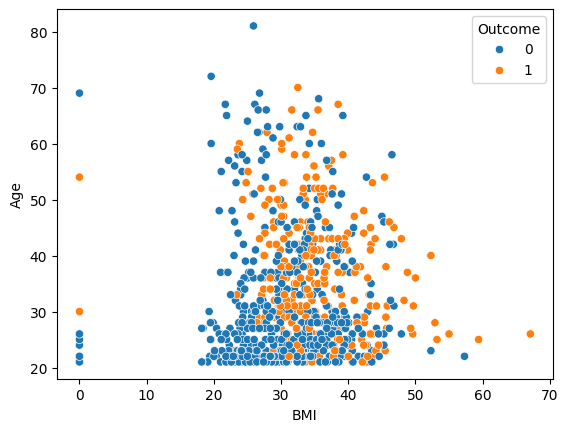

In [ ]:
# On regarde si on voit un lien visuel entre Age, BMI et le Diabète (Outcome)
# Change les noms des colonnes selon ton fichier !
sns.scatterplot(data=df, x='BMI', y='Age', hue='Outcome')
plt.show()

In [ ]:
# 1. On définit les colonnes qu'on utilise pour prédire (les Features)
# Mettons que tu utilises l'IMC (BMI) et l'Age

# Avant c'était : X = df[['BMI', 'Age']] avec une precision de 644,

# Essaie ça (vérifie les noms exacts avec print(df.columns) si besoin) :
X = df[['BMI', 'Age', 'Glucose', 'BloodPressure', 'Insulin']]

# 2. On définit ce qu'on veut prédire (la Target)
y = df['Outcome'] # Ou 'Diabetes', vérifie le nom

# 3. On coupe le jeu en deux : une partie pour apprendre (80%), une pour tester (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. On crée le cerveau (Régression Logistique - simple et efficace pour commencer)
model = LogisticRegression()

# 5. L'entraînement (C'est là qu'il apprend)
model.fit(X_train, y_train)

# 6. La prédiction sur les données qu'il n'a jamais vues
predictions = model.predict(X_test)

# 7. Le verdict : Quelle est ta note ?
precision = accuracy_score(y_test, predictions)
print(f"Précision du modèle : {precision * 100:.2f}%")

from sklearn.preprocessing import StandardScaler

# 1. On crée le "Mise à l'échelle" (Scaler)
scaler = StandardScaler()

# 2. On l'entraîne sur tes données X_train et on transforme les données
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. On entraîne le modèle sur ces nouvelles données
model.fit(X_train_scaled, y_train)

# 4. On vérifie si la précision a bougé
predictions = model.predict(X_test_scaled)
print(f"Nouvelle précision : {accuracy_score(y_test, predictions) * 100:.2f}%")

Précision du modèle : 74.68%
Nouvelle précision : 74.68%


#Preparation environement Streamlit

In [ ]:
# Installation de Streamlit
!pip install streamlit -q


<!DOCTYPE html>
<html>
  <head>
    <meta http-equiv="Content-type" content="text/html; charset=utf-8">
    <meta http-equiv="Content-Security-Policy" content="default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'">
    <title>Site not found &middot; GitHub Pages</title>
    <style type="text/css" media="screen">
      body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { width: 800px; position:relative; left: -100px; letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px 0 50px 0; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0; line-height: 1.6; }

      ul { list-style: none; margin: 25px 0; padding: 0; }
      li { d
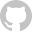
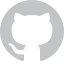

In [ ]:
# Cette commande va chercher l'URL du tunnel qui tourne en arrière-plan
!curl https://localtunnel.github.io/version/ && curl -s https://locall.host/$(curl -s https://ipv4.icanhazip.com)

In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Chargement sécurisé
try:
    model = pickle.load(open('model_diabete.pkl', 'rb'))
    scaler = pickle.load(open('scaler.pkl', 'rb'))
except:
    st.error("Erreur : Fichiers manquants. Relancez les cellules de sauvegarde dans Colab.")

st.title("🩺 Diagnostic Diabète IA")

# On crée les entrées
bmi = st.number_input("IMC (BMI)", value=22.0)
age = st.number_input("Âge", value=25)
glucose = st.number_input("Glucose", value=90)
bp = st.number_input("Pression Artérielle", value=70)
ins = st.number_input("Insuline", value=15)

if st.button("Analyser"):
    # L'ORDRE DOIT ÊTRE IDENTIQUE À TON X_train : BMI, Age, Glucose, BloodPressure, Insulin
    features = np.array([[bmi, age, glucose, bp, ins]])

    # APPLICATION DU SCALER (INDISPENSABLE)
    features_scaled = scaler.transform(features)

    prediction = model.predict(features_scaled)
    probability = model.predict_proba(features_scaled)[0][1] * 100

    st.markdown("---")
    if prediction[0] == 1:
        st.error(f"### ⚠️ Risque Élevé ({probability:.1f}%)")
    else:
        st.success(f"### ✅ Risque Faible ({100 - probability:.1f}% de chance d'être sain)")

Overwriting app.py


In [ ]:
import pickle
# Vérifie bien le nom de ta variable ici !
with open('model_diabete.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Fichier model_diabete.pkl créé !")

Fichier model_diabete.pkl créé !


In [ ]:
import urllib
print("1. Ton mot de passe est toujours :", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip())
print("2. Clique sur le lien ci-dessous dès qu'il apparaît :")

# Lancement avec serveo (plus stable sur Colab ces temps-ci)
!streamlit run app.py & ssh -o "StrictHostKeyChecking=no" -R 80:localhost:8501 serveo.net

1. Ton mot de passe est toujours : 34.48.245.64
2. Clique sur le lien ci-dessous dès qu'il apparaît :


Forwarding HTTP traffic from https://da697c8059aa0457-34-48-245-64.serveousercontent.com

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.48.245.64:8501

